This notebook is supposed to be the final version of ETT curves.
It has a few requirements:
- Implements the final ETT version
- Easy to read by others
- Easy to use API (methods in the ET class)
- Easy to use as a node in the Orchest pipeline

# Imports
Add and remove for orchest

In [1]:
# from utils import load_and_prepare_building_dfs, get_voll_temps, normalize_building_dfs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from kneed import KneeLocator
import random
import orchest
from et import ET, ETT

plt.rcParams['figure.figsize'] = (20, 5)

# Load Data
Change this to output of previous nodes for ochest

In [2]:
data = orchest.get_inputs()

clarify_data = data['clarify_data']
# energy_consumption_dfs = clarify_data['energy_consumption']
temperature_df = clarify_data['temperature']

normalized_data = data['normalized_data']
energy_consumption_dfs = normalized_data['energy_consumption']
# energy_consumption_dfs = clarify_data['energy_consumption']

building_dfs = energy_consumption_dfs['daily']
daily_temp = temperature_df['daily']['Voll TAN']

# ET, Regressor and Optimizer
The ET class has friendly methods based on the ET regression model generated by the regressor.

The Regressor function creates a model based on energy vs temp.

The Optimizer finds suitable parameters for the regressor and ET class (PPS and threshold) and returns 7 ET objects, one for each weekday

# Create ETT for all buildings

Monday


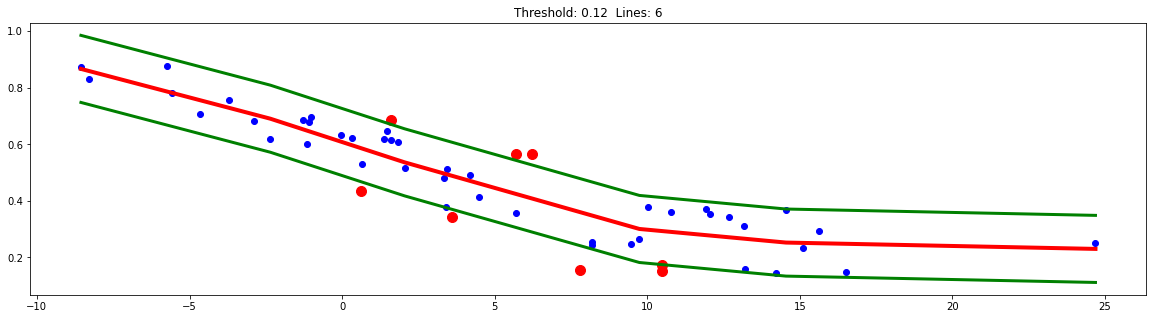

Tuesday


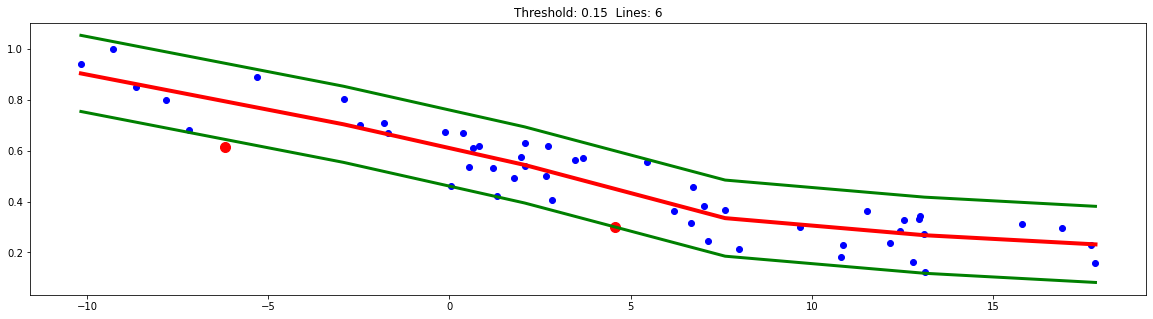

Wednesday


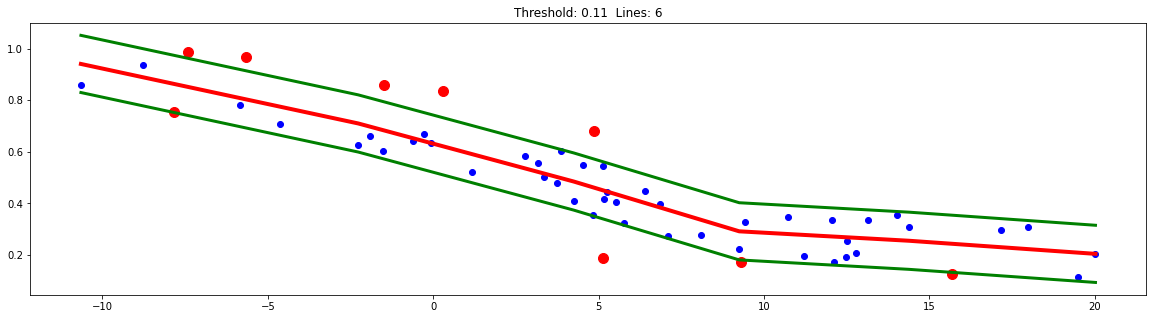

Thursday


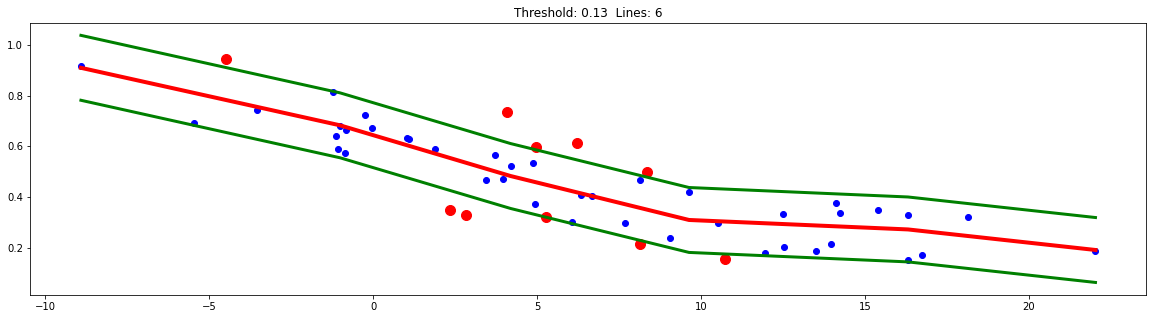

Friday


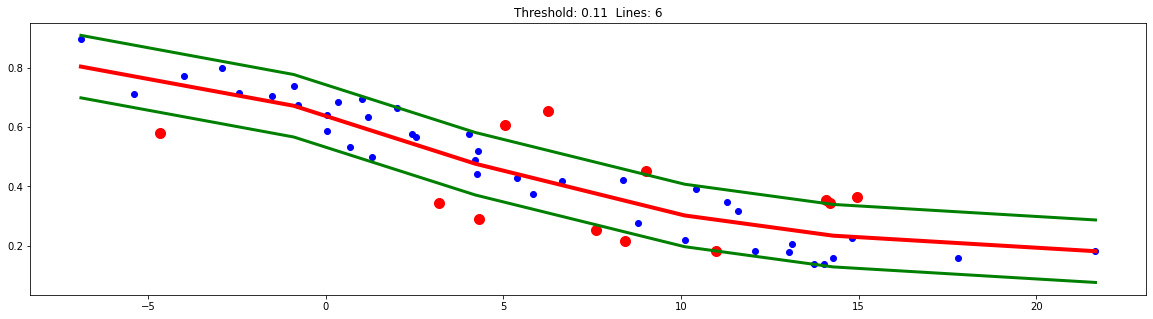

Saturday


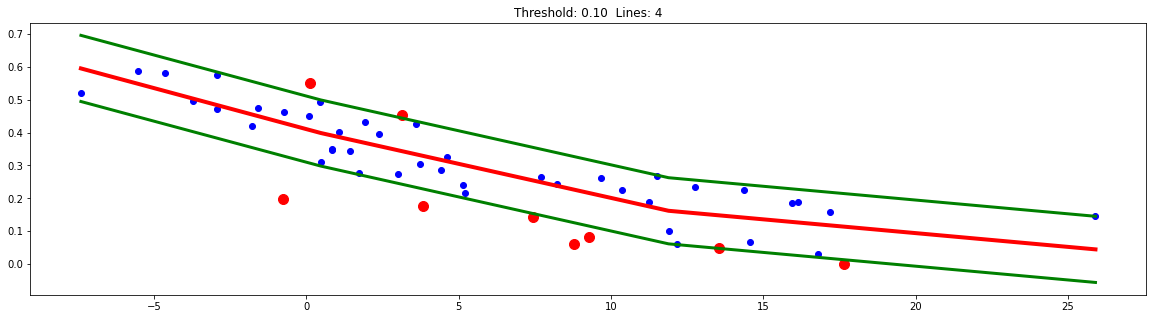

Sunday


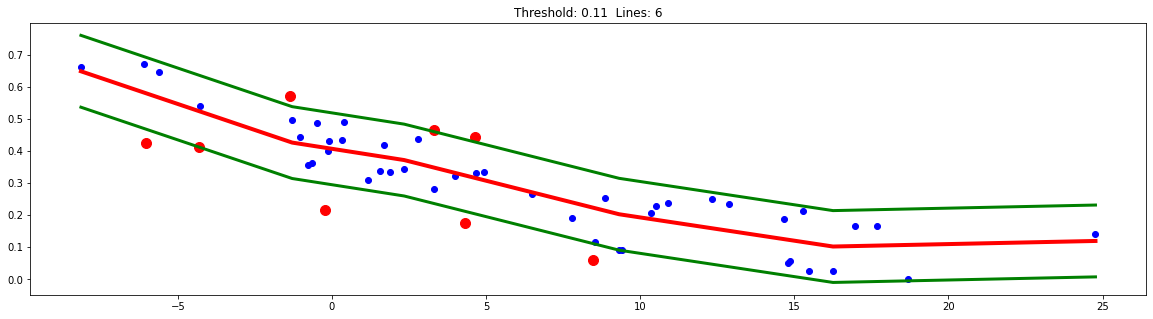

Monday


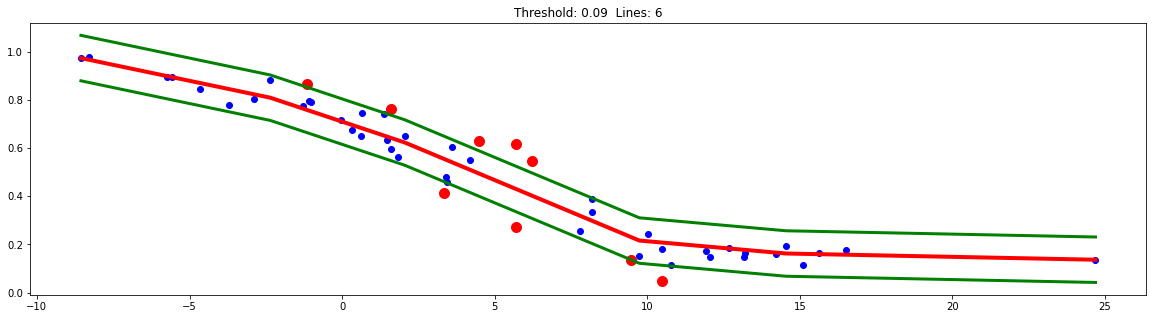

Tuesday


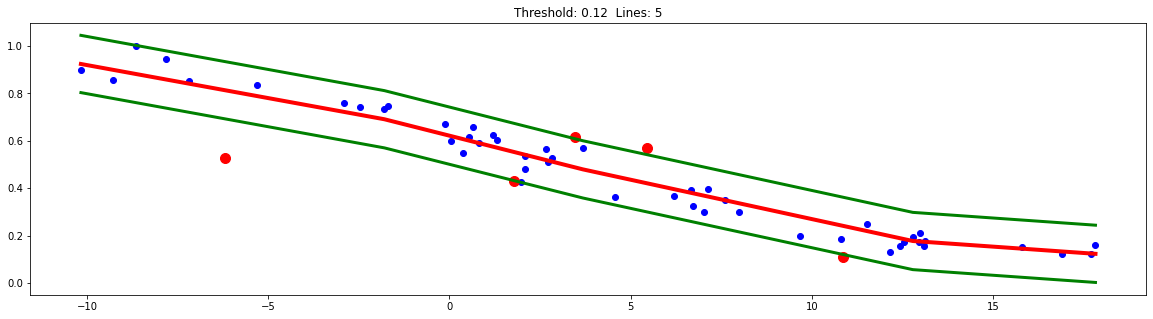

Wednesday


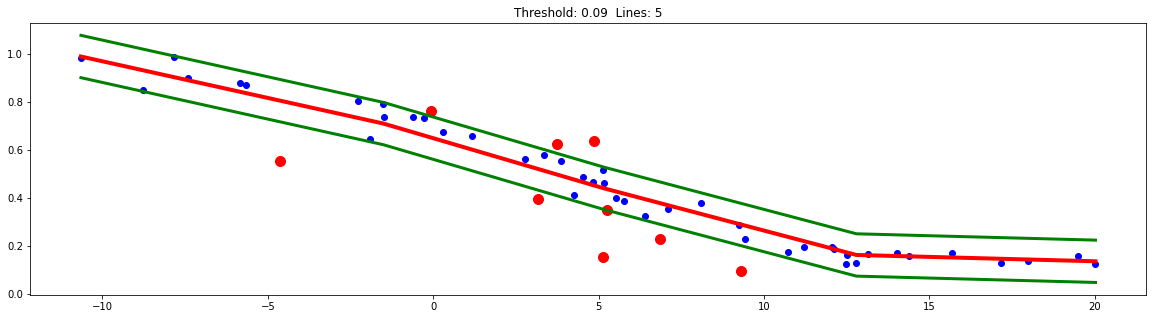

Thursday


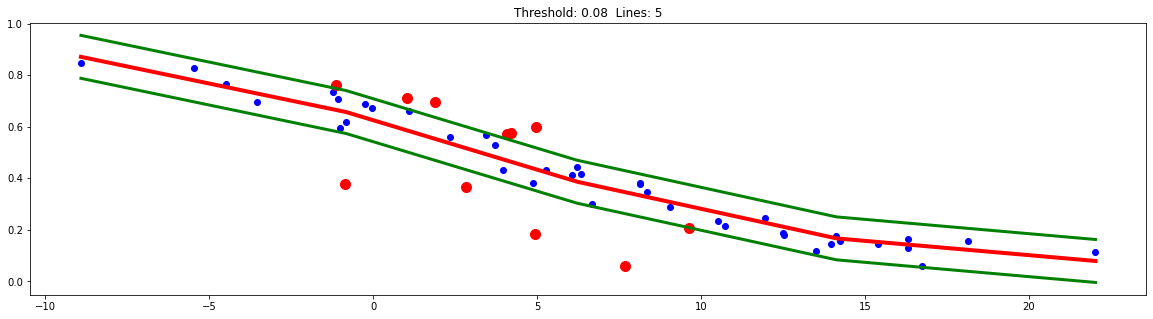

Friday


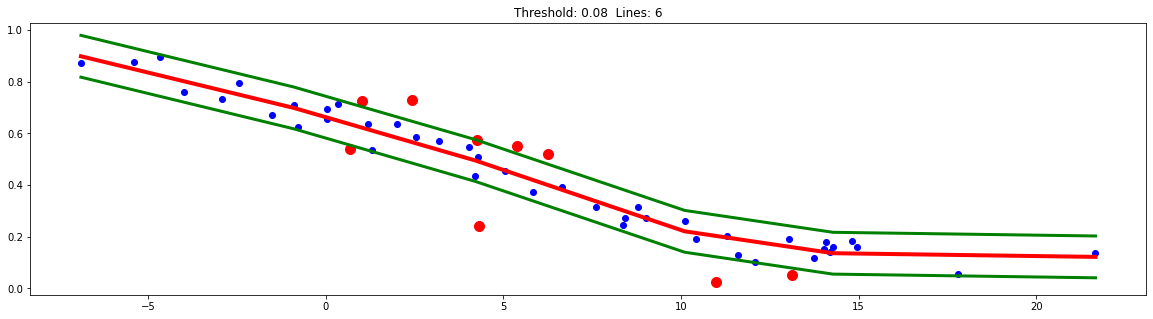

Saturday


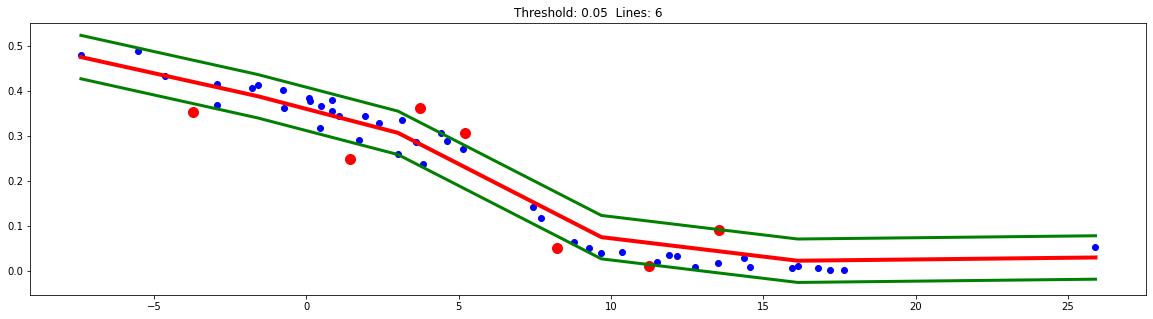

Sunday


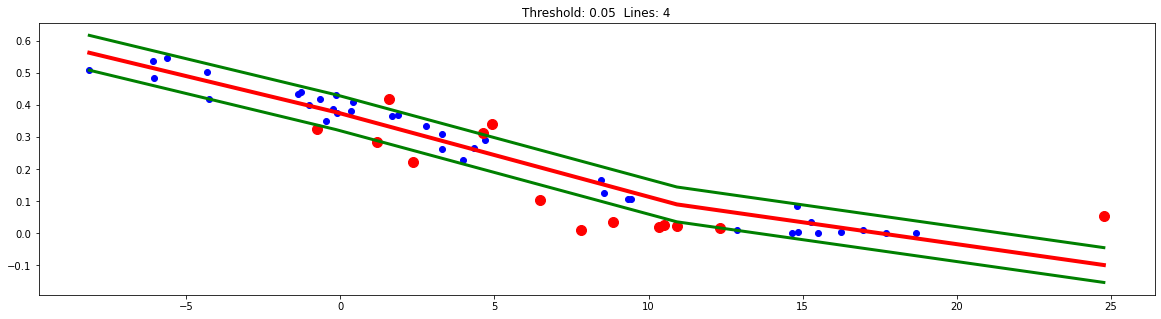

Monday


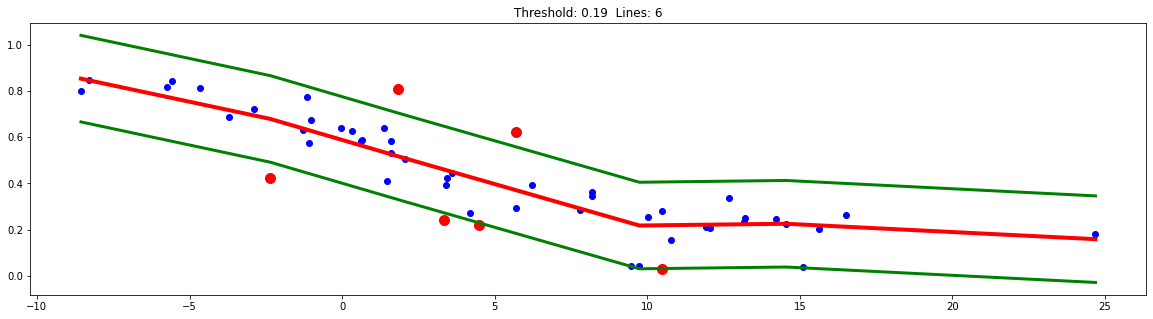

Tuesday


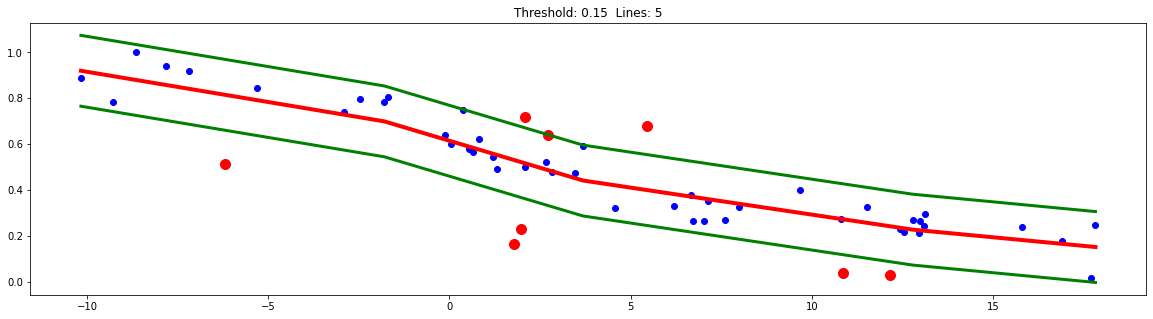

Wednesday


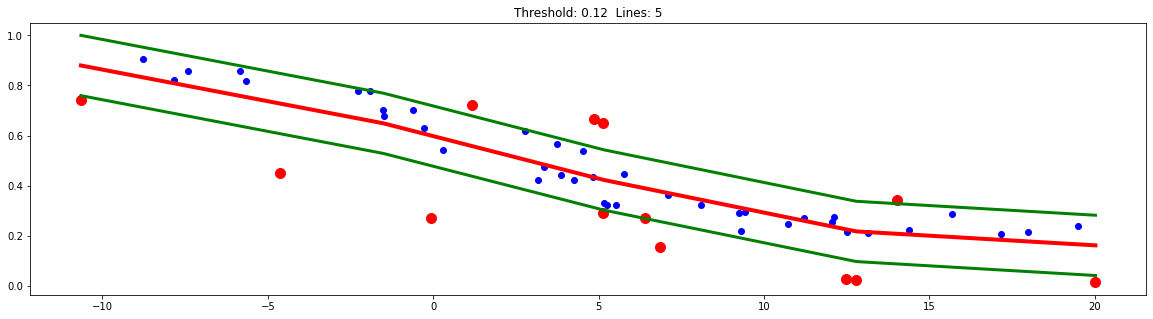

Thursday


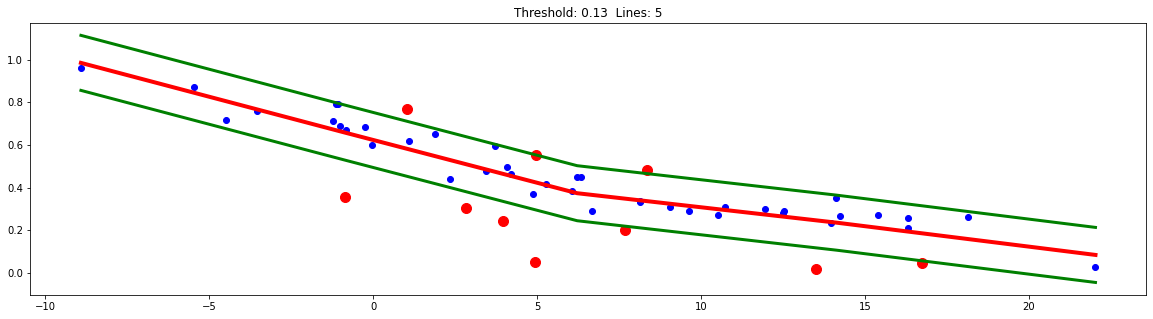

Friday


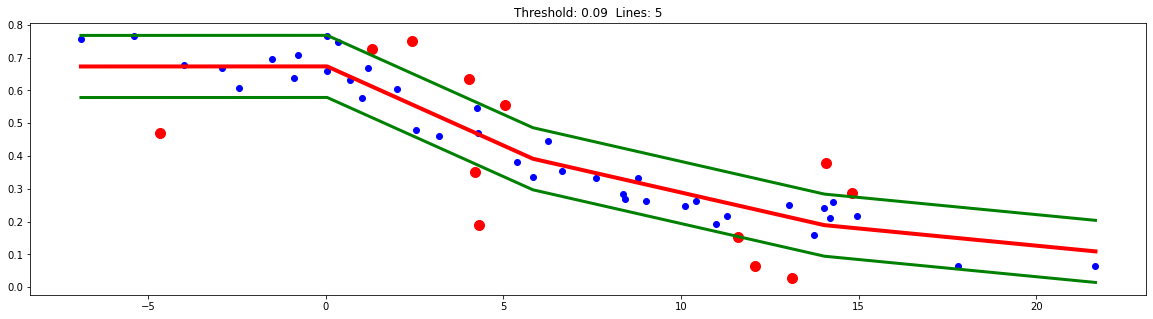

Saturday


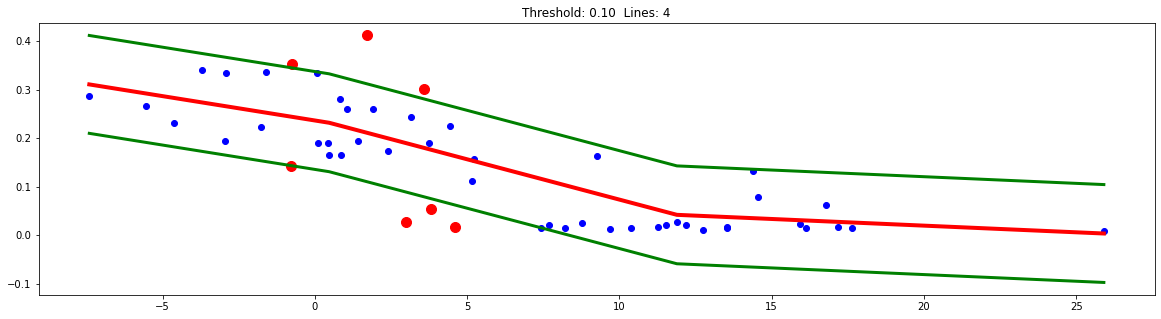

Sunday


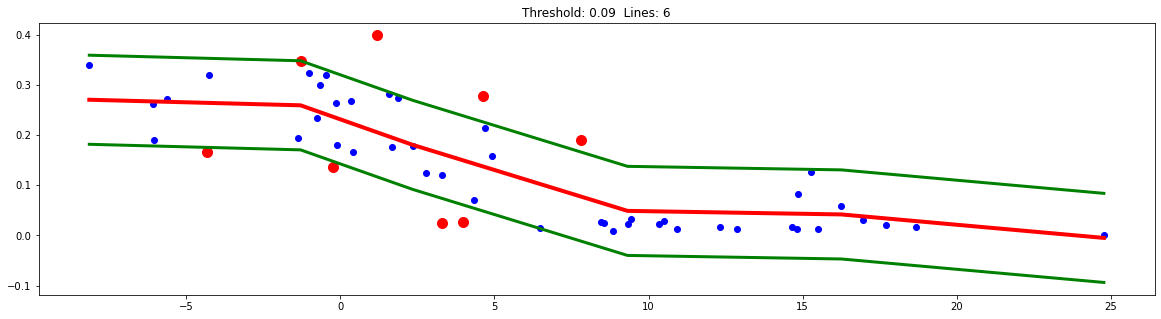

Monday


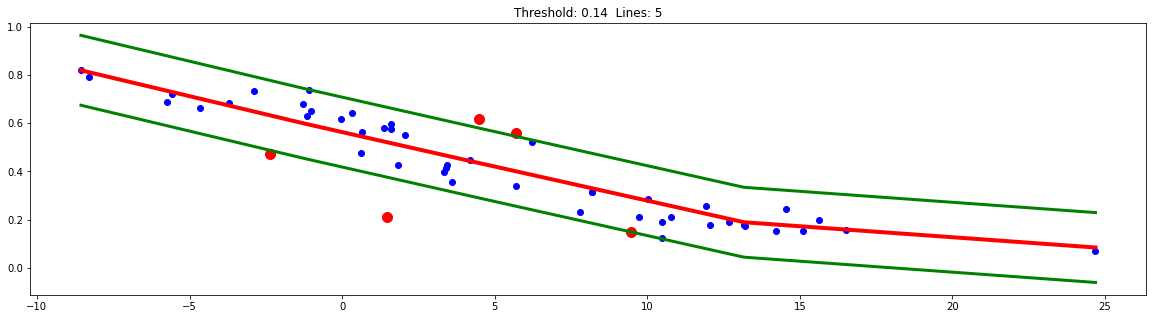

Tuesday


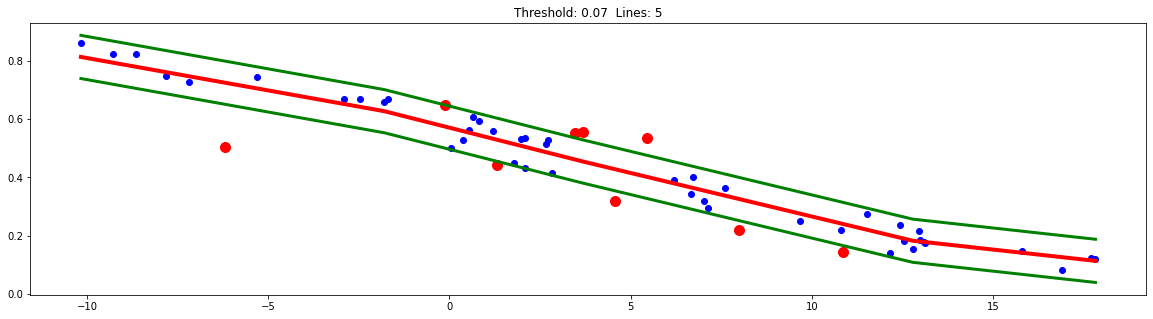

Wednesday


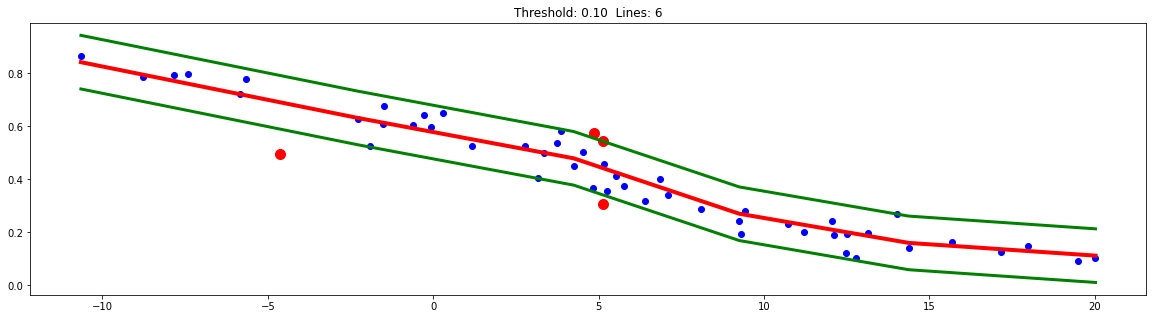

Thursday


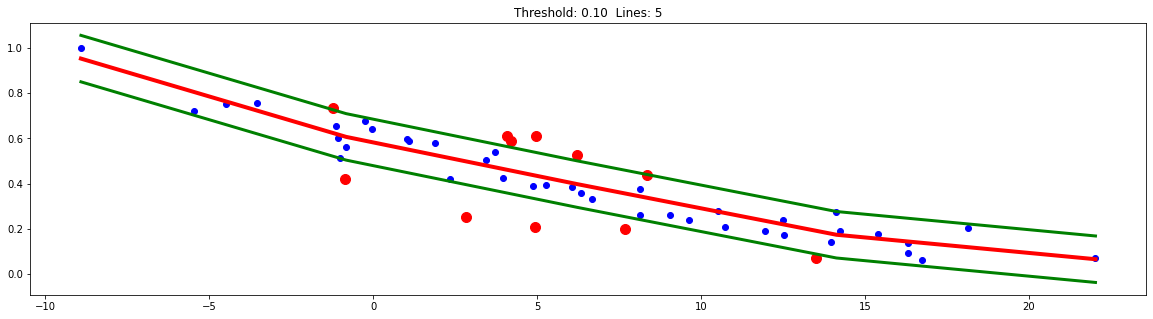

Friday


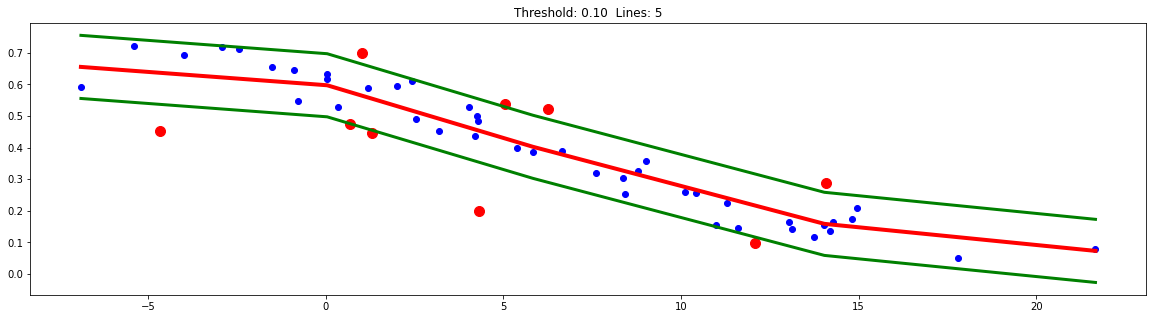

Saturday


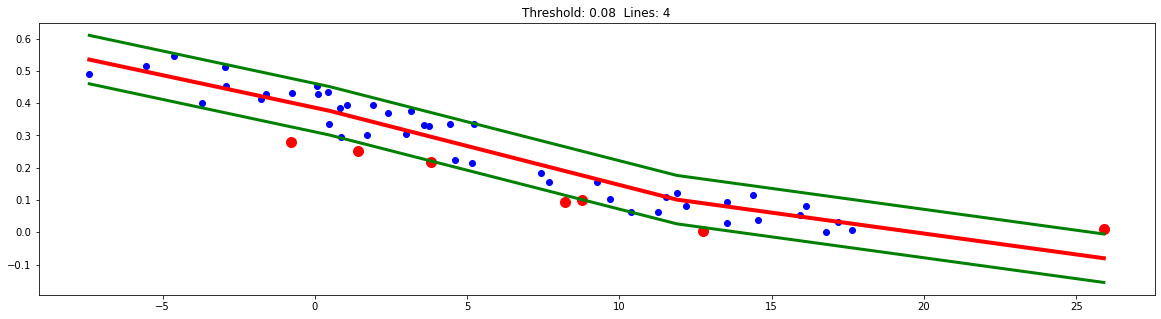

Sunday


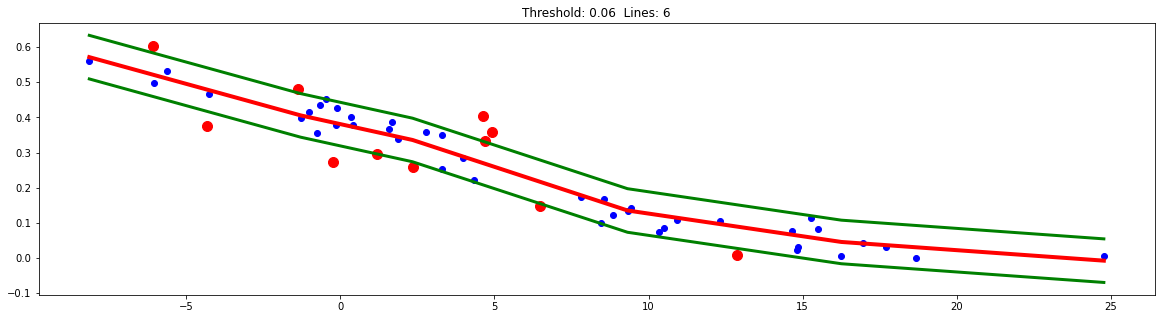

/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


No ETT found for Hammersborg barnehage


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


No ETT found for Smidalen barnehage


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


/opt/conda/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


No ETT found for Sverresborg Friluftsbarnehage


In [3]:
# create ETT curves for all buildings
ETTs = {}
i = 0
for building_name, building_data in list(building_dfs.items()):
    building_energy = building_data['Totalt']
    # create ETT for this building
    ett = ETT()
    success = ett.fit(daily_temp, building_energy)
    if not success:
        print('No ETT found for ' + building_name)
        continue
    
    if i < 4:
        ett.plot(building_energy, daily_temp)
    i += 1
    
    ETTs[building_name] = ett

In [4]:
et_curves = {
    'ett_day_of_week': ETTs
}

In [5]:
print('outputting generated et curves...')
orchest.output(et_curves, name='et_curves')
print('success')

outputting generated et curves...
success


In [6]:
# histograms of the different stats
# plt.title('Best line amounts')
# plt.hist(best_line_amounts, bins='auto')
# plt.show()

# plt.title('Best anomaly amounts')
# plt.hist(best_anomaly_amounts, bins='auto')
# plt.show()

# plt.title('Best MSE amounts')
# plt.hist(best_mse_amounts, bins='auto')
# plt.show()

# plt.title('Best thresholds')
# plt.hist(best_thresholds, bins='auto')
# plt.show()

In [7]:
# plot the ETT of a random building
# building_name = random.choice(list(ETTs.keys()))
# ETT = ETTs[building_name]
# print('ETT for ' + building_name)

# # get energy usage of that building
# building_energy = building_dfs[building_name]['Totalt']

# # ETT consists of 7 graphs, one for each day of the week
# for day, et in ETT.items():
#     # get energy and temperature data for this day
#     day_energy = building_energy.loc[building_energy.index.weekday == week_days.index(day)]
#     day_temp = daily_temp.loc[daily_temp.index.weekday == week_days.index(day)]

#     print(day)
#     et.plot(day_energy, day_temp)